In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# importing dataset 

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv')


# data exploration 

In [3]:
df.head(3)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence


# change some features names 

In [4]:
df.rename(columns={'BP':'Blood Pressure','FBS over 120':'Sugre Blood Value', 'Max HR':'Max heart rate','ST depression':'Segment Depression'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   Blood Pressure           270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   Sugre Blood Value        270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max heart rate           270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   Segment Depression       270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.describe()

,Age,Sex,Chest pain type,Blood Pressure,Cholesterol,Sugre Blood Value,EKG results,Max heart rate,Exercise angina,Segment Depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
Blood Pressure             0
Cholesterol                0
Sugre Blood Value          0
EKG results                0
Max heart rate             0
Exercise angina            0
Segment Depression         0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

# plots 

([<matplotlib.patches.Wedge at 0x7858211def50>,
 [Text(-0.1910130855889933, 1.083288512416601, 'Absence'),
  Text(0.19101318701378264, -1.0832884945326604, 'Presence')],
 [Text(-0.10418895577581451, 0.5908846431363277, '56%'),
  Text(0.10418901109842689, -0.5908846333814511, '44%')])

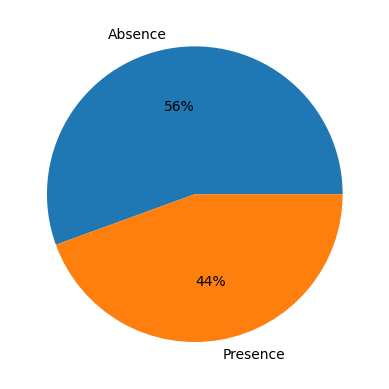

In [8]:
# ratio between people who have disease or not 
heart_disease = df['Heart Disease'].value_counts()
plt.pie(heart_disease.values,labels=heart_disease.index,autopct='%.0f%%')

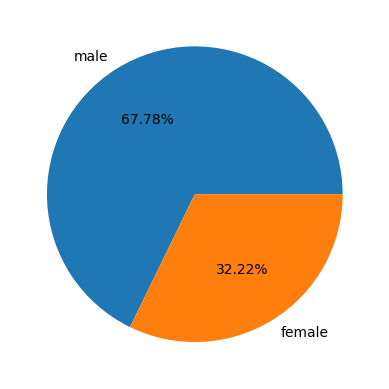

In [9]:
# ratio between Males and Famales 
male_female_ratio = df['Sex'].value_counts()
plt.pie(male_female_ratio,labels = ['male','female'],autopct='%.2f%%')
plt.show()

<BarContainer object of 4 artists>

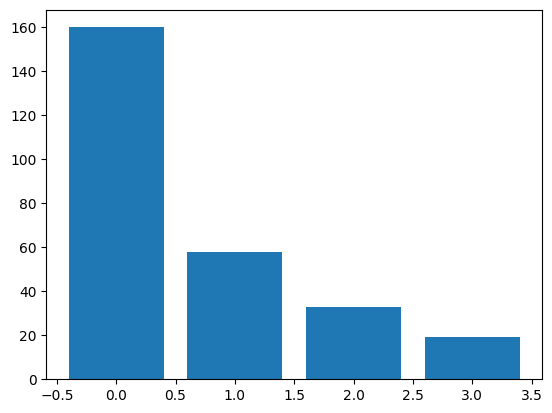

In [10]:
# number of vessel
# zeo means no vessels are closed   
# one refer to one vessels is closed and so on
number_vessels_fluro = df['Number of vessels fluro'].value_counts()
plt.bar(x=number_vessels_fluro.index,height=number_vessels_fluro.values)

In [11]:
df.sample()

,Age,Sex,Chest pain type,Blood Pressure,Cholesterol,Sugre Blood Value,EKG results,Max heart rate,Exercise angina,Segment Depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
239,52,1,2,120,325,0,0,172,0,0.2,1,0,3,Absence


In [12]:
def draw_histogram_continuse_data(col_name):
    plt.hist(col_name,edgecolor='black',color='#ff4f36')

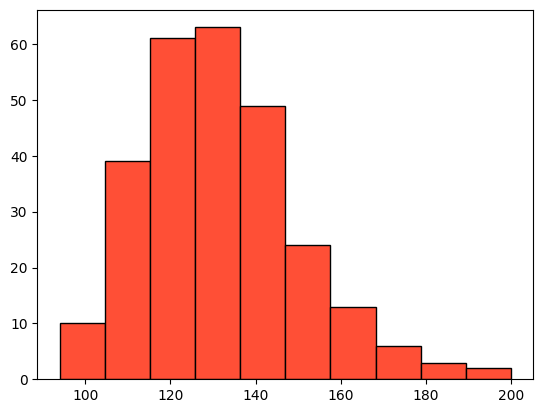

In [13]:
draw_histogram_continuse_data(df['Blood Pressure'])

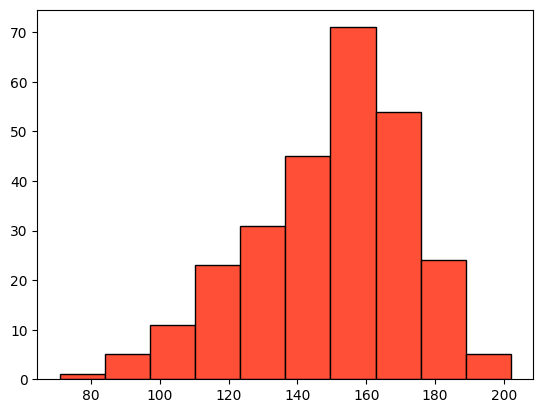

In [14]:

draw_histogram_continuse_data(df['Max heart rate'])

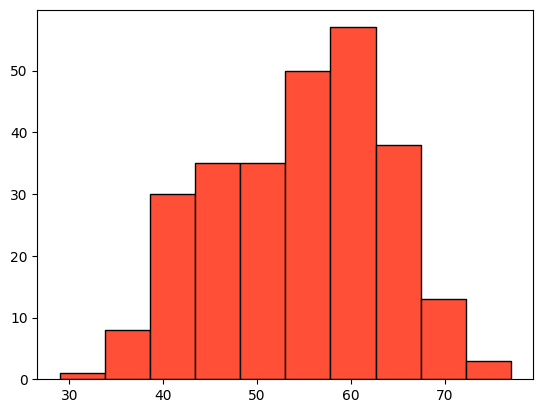

In [15]:

draw_histogram_continuse_data(df['Age'])

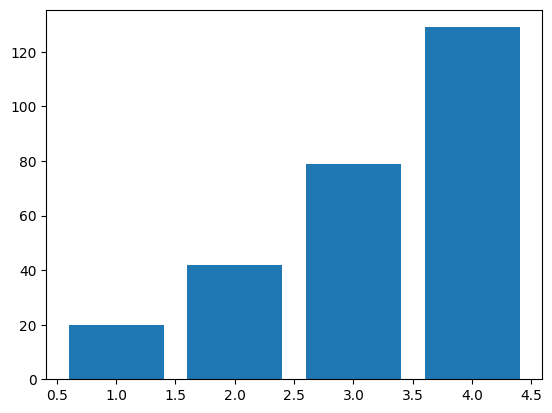

In [16]:
# chest pain types are:

# Typical Angina(1)   Atypical Angina(2)   Non-anginal Pain(3)   Asymptomatic (No Chest Pain)(4)
# fist one is the most dengure but it is raio very small 
chest_pain_type = df['Chest pain type'].value_counts()
plt.bar(x= chest_pain_type.index,height=chest_pain_type.values)
plt.show()

# encoding the heart diseas 

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Heart Disease'] = LE.fit_transform(df['Heart Disease'])
df['Heart Disease']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

# correlation betweeen variables 

<Axes: >

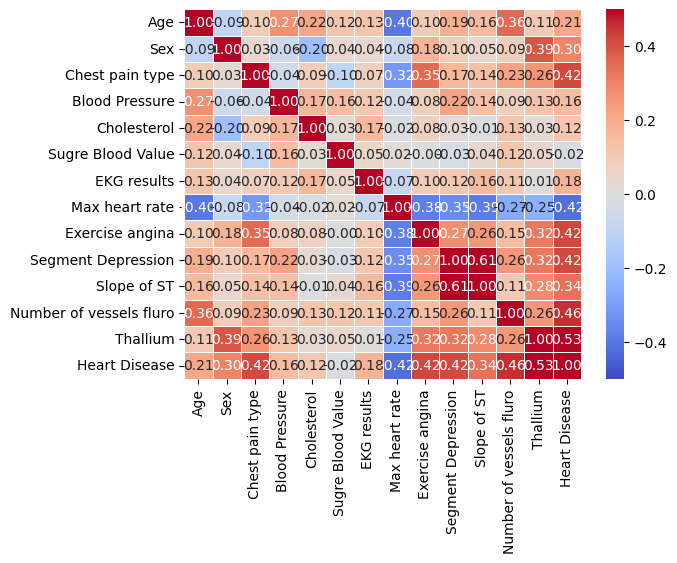

In [18]:
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot= True,fmt = '.2f',linewidths=0.5, vmax=0.5,vmin=-0.5)


# extracting dependent and independent vars

In [19]:
X = df.drop(['Heart Disease','Max heart rate'],axis=1)
y = df['Heart Disease']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)


# feature scaling 

In [21]:
from sklearn.preprocessing import StandardScaler 
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

# training models 

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
def training_model(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    acc = accuracy_score(y_test,y_predict)
    cm = confusion_matrix(y_predict,y_test)
    return acc,cm
    

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               GaussianNB(),
               SVC(),
               KNeighborsClassifier(n_neighbors=5),
               RandomForestClassifier(n_estimators=10),
              ]
results = []
for classifier in classifiers:
    acc,cm = training_model(classifier)
    results.append({'accurecy':acc,'Confusion metraix':cm})
results


[{'accurecy': 0.7777777777777778,
  'Confusion metraix': array([[13,  2],
         [ 4,  8]])},
 {'accurecy': 0.8518518518518519,
  'Confusion metraix': array([[14,  1],
         [ 3,  9]])},
 {'accurecy': 0.7407407407407407,
  'Confusion metraix': array([[13,  3],
         [ 4,  7]])},
 {'accurecy': 0.7407407407407407,
  'Confusion metraix': array([[13,  3],
         [ 4,  7]])},
 {'accurecy': 0.7777777777777778,
  'Confusion metraix': array([[14,  3],
         [ 3,  7]])},
 {'accurecy': 0.8148148148148148,
  'Confusion metraix': array([[15,  3],
         [ 2,  7]])}]

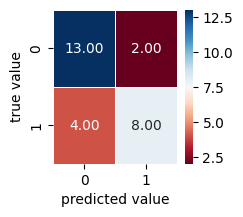

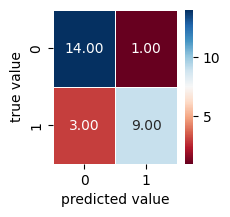

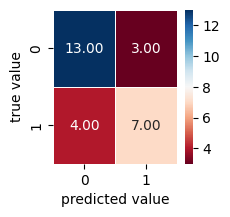

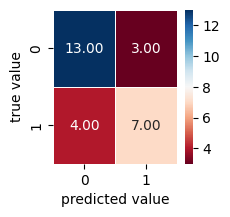

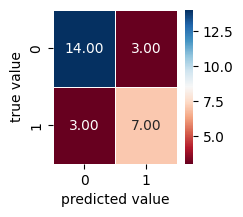

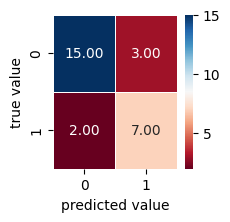

In [24]:
results[0]['accurecy']
accurecies = []
for ele in range(len(results)):
    plt.figure(figsize=(2,2))
    sns.heatmap(results[ele]['Confusion metraix'],annot=True,cmap='RdBu',fmt='.2f',linewidths=0.5)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()
    accurecies.append(results[ele]['accurecy'])